In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle/titanic-project-kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/kaggle/titanic-project-kaggle
#Check the present working directory

In [4]:
train_dir = r'/content/gdrive/My Drive/kaggle/titanic-project-kaggle/train.csv'
test_dir = r'/content/gdrive/My Drive/kaggle/titanic-project-kaggle/test.csv'

In [5]:
data = pd.read_csv(train_dir)
test = pd.read_csv(test_dir)

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
data.columns = data.columns.str.lower()
test.columns = test.columns.str.lower()

In [9]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.shape

(891, 12)

In [19]:
data.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [13]:
mapping = {'male':0, 'female': 1}
data['sex'] = data['sex'].map(mapping)
test['sex'] = test['sex'].map(mapping)

In [15]:
data.drop(['passengerid', 'name', 'ticket', 'cabin', 'embarked'], axis = 1, inplace = True)
test.drop(['name', 'ticket', 'cabin', 'embarked'], axis = 1, inplace = True)

In [18]:
test.isnull().sum()

passengerid    0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
dtype: int64

In [16]:
data['age'].fillna(np.round(data.age.mean()), inplace = True)
test['age'].fillna(np.round(test.age.mean()), inplace = True)
data['age'] = data['age'].astype(np.int16)
test['age'] = test['age'].astype(np.int16)

In [17]:
test['fare'].fillna(test.fare.mean(), inplace = True)

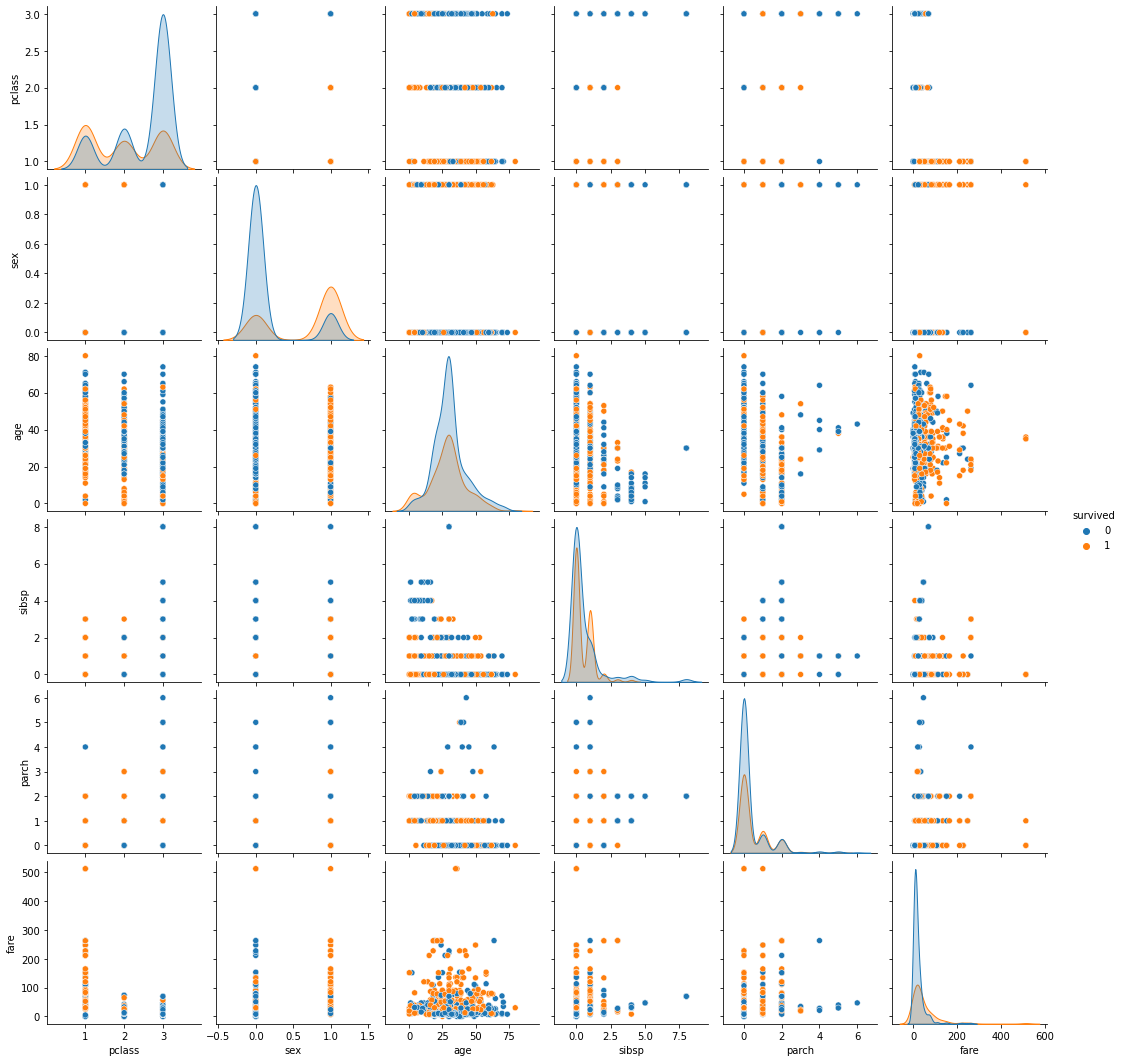

In [20]:
sns.pairplot(data = data, hue = 'survived');

In [21]:
X, y = data.iloc[:, 1:], data['survived']
X_val, y_val = X.values, y.values

In [22]:
sss = StratifiedShuffleSplit(n_splits = 30, test_size=0.30, random_state=45)
for train_index, test_index in sss.split(X_val, y_val):
    X_train, X_test = X_val[train_index], X_val[test_index]
    y_train, y_test = y_val[train_index], y_val[test_index]

In [23]:
def validation_score_and_variance(model, X_val, y_val, cv = 10):
    scaler = StandardScaler()
    power = PowerTransformer()
    pipe = Pipeline([('scaler', scaler)])
    X_val = pipe.fit_transform(X_val)
    score = cross_val_score(estimator=model, X = X_val, y = y_val, scoring='accuracy', cv = cv)
    return (f'the mean accuracy is: {score.mean():.2f} and the variance is {score.std():.4f}')

In [24]:
lg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors= 15)
svc = SVC()

In [25]:
for model in [lg, knn, svc]:
    print(f'for {model.__class__.__name__} {validation_score_and_variance(model= model, X_val= X_val, y_val = y_val, cv = sss)}')

for LogisticRegression the mean accuracy is: 0.80 and the variance is 0.0177
for KNeighborsClassifier the mean accuracy is: 0.82 and the variance is 0.0186
for SVC the mean accuracy is: 0.83 and the variance is 0.0163


In [26]:
class acc_grid_search:
 
    def __init__(self, model, param_grid, X_train, y_train, X_test, y_test):
        self.model = model
        self.param_grid = param_grid
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
 
    def grid_search(self):
        self.grid = GridSearchCV(estimator= self.model, param_grid=self.param_grid, scoring = 'accuracy')
        self.grid.fit(self.X_train, self.y_train)
        return [self.grid.best_estimator_, self.grid.best_params_]
 
    def accuracy(self):
        model_grid = self.grid_search()[0]
        model_grid.fit(self.X_train, self.y_train) 
        y_pre = model_grid.predict(self.X_test)
        print(accuracy_score(self.y_test, y_pre))
 
    def __str__(self):
        return f'{self.model.__class__.__name__} as the following parameters: {self.grid_search()[1]}'

In [30]:
 
model = LogisticRegression()
param_grid = {'C':np.arange(0.01, 10)}
acc_grid = acc_grid_search(model, param_grid, X_train, y_train, X_test, y_test)
print(acc_grid.accuracy())
print(acc_grid)

0.7873134328358209
None
LogisticRegression as the following parameters: {'C': 1.01}


In [28]:
model1 = SVC()
param_grid1 = {'C':np.linspace(0.01, 10, 10)}
acc_grid1 = acc_grid_search(model1, param_grid1, X_train, y_train, X_test, y_test)
print(acc_grid1.accuracy())
print(acc_grid1)

0.7201492537313433
None
SVC as the following parameters: {'C': 10.0}


In [29]:
model2 = KNeighborsClassifier()
param_grid2 = {'n_neighbors':np.arange(3, 25, 2)}
acc_grid2 = acc_grid_search(model2, param_grid2, X_train, y_train, X_test, y_test)
print(acc_grid2.accuracy())
print(acc_grid2)

0.6865671641791045
None
KNeighborsClassifier as the following parameters: {'n_neighbors': 9}


In [31]:
passengerid = test['passengerid']

In [36]:
model.fit(X_train, y_train)
survived = model.predict(test.iloc[:,1:])

In [37]:
submission = pd.Series(survived, index = passengerid, name='submission_file')
submission.head()

passengerid
892    0
893    0
894    0
895    0
896    1
Name: submission_file, dtype: int64

In [38]:
submission.to_csv(r'/content/gdrive/My Drive/kaggle/titanic-project-kaggle/submission.csv')